In [3]:
#from create_embedding_DB import ChromaEmbeddingProcessor
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

In [2]:
model_path = 'Checkpoints/checkpoint.pt'
tokenizer_path = 'tokenizer/wordPieceVocab.json'
csv_file = 'dataset/dataset_sentences.csv'
storage_path = 'vectorDB/'

dataset_csv = pd.read_csv('dataset/merged_stories_full.csv')
random_state = 123  # We will be testing the Test set defined during training
train_val, test = train_test_split(dataset_csv, test_size=0.1, random_state=random_state)

processor = ChromaEmbeddingProcessor(model_path, tokenizer_path, csv_file, storage_path)

results = processor.process_query('Magical lights, carrots and happy dreams')

In [6]:
correct = 0
for title in test.Title.unique():
    results = processor.process_query(title)
    for title_result in results['metadatas'][0]:
        if title_result['title'] == title:
            correct+=1
            break
            
print('Accuracy@5:',str(correct/len(test.Title.unique())))
            

Accuracy@5: 0.0


In [7]:
correct

0

### TRAIN/VAL/TEST SPLIT

In [2]:
dataset_csv = pd.read_csv('dataset/merged_stories_full.csv')
dataset_sentences = pd.read_csv('dataset/dataset_sentences.csv')
random_state = 123  # We will be testing the Test set defined during training
val_size = 0.1
test_size = 0.1
train, val_test = train_test_split(dataset_csv, test_size=0.2, random_state=random_state)
val, test = train_test_split(val_test, test_size=0.5, random_state=random_state)

print('# text train:',str(len(train)))
print('# text val:',str(len(val)))
print('# text test:',str(len(test)))

# text train: 894
# text val: 112
# text test: 112


In [5]:
dataset_sentences = pd.read_csv('dataset/dataset_sentences.csv')
sent_train = dataset_sentences[dataset_sentences.Title.isin(train.Title.unique())]
sent_val = dataset_sentences[dataset_sentences.Title.isin(val.Title.unique())]
sent_test = dataset_sentences[dataset_sentences.Title.isin(test.Title.unique())]

print('# sentences train:',str(len(sent_train)))
print('# sentences val:',str(len(sent_val)))
print('# sentences test:',str(len(sent_test)))

# sentences train: 107326
# sentences val: 12992
# sentences test: 10938


### NUMBER OF SENTENCES PER TEXT

In [6]:
tr = []
v = []
te = []
d = []
for i in sent_train.Title.unique():
    sub = sent_train[sent_train.Title == i]
    tr.append(len(sub))

for i in sent_val.Title.unique():
    sub = sent_val[sent_val.Title == i]
    v.append(len(sub))

for i in sent_test.Title.unique():
    sub = sent_test[sent_test.Title == i]
    te.append(len(sub))

for i in dataset_sentences.Title.unique():
    sub = dataset_sentences[dataset_sentences.Title == i]
    d.append(len(sub))
print('# sentences per text train:',np.mean(tr),np.std(tr),np.median(tr))
print('# sentences per text val:',np.mean(v),np.std(v),np.median(v))
print('# sentences per text test:',np.mean(te),np.std(te),np.median(te))
print('# sentences per text whole:',np.mean(d),np.std(d),np.median(d))

#tra =np.histogram(tr, bins=np.max(tr)/2, range=(0, np.max(tr)))[0]
#va =np.histogram(v, bins=np.max(v)/2, range=(0, np.max(v)))[0]
#tes =np.histogram(te,bins=np.max(te)/2, range=(0, np.max(te)))[0]

#plt.figure(figsize = (8,5))
#plt.hist(tr,bins = 10, weights=np.ones_like(tr) / len(tr), color = 'teal', label = 'Training set')
#plt.hist(v,bins = 5, weights=np.ones_like(v) / len(v), color = 'orange', label = 'Validation set')
#plt.hist(te,bins = 5, weights=np.ones_like(te) / len(te), color = 'red', label = 'Test set')

#plt.stairs(tra/np.sum(tra)*100,np.linspace(0,np.max(tr),31),color='darkslateblue',linewidth=2,label='Training set')
#plt.stairs(va/np.sum(va)*100,np.linspace(0,np.max(v),31),color='orange',linewidth=2,label='Validation set')
#plt.stairs(tes/np.sum(tes)*100,np.linspace(0,np.max(v),31),color='green',linewidth=2,label='Test set')

#plt.title('Number of sentences per text',fontsize=25)
#plt.xlabel('Sentences per text',fontsize=22)
#plt.ylabel('Relative frequency (%)',fontsize=22)
#plt.tick_params(axis='both', which='major', labelsize=15)
#plt.ylim([0,30])
#plt.xlim([0,400])

#plt.legend(fontsize=15);
#plt.savefig('Plots/mozambican_histogram.png',dpi=200,transparent=True)

# sentences per text train: 123.93302540415705 247.25364512867156 81.0
# sentences per text val: 118.10909090909091 120.93013350725552 89.0
# sentences per text test: 97.66071428571429 75.42481516282913 73.5
# sentences per text whole: 119.98797409805735 225.80250317073856 81.0


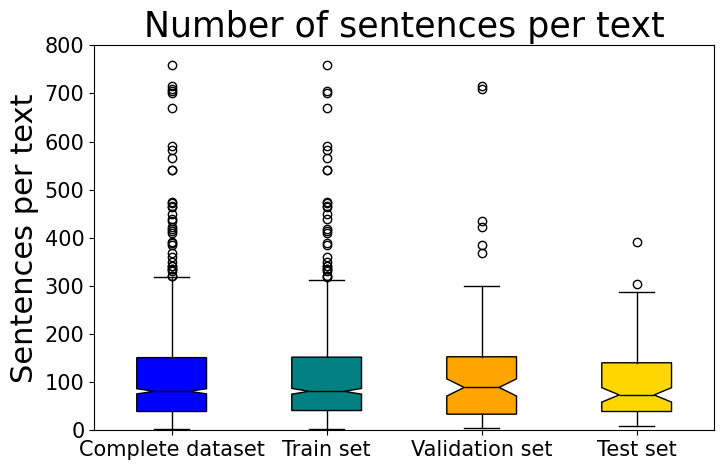

In [8]:
plt.figure(figsize = (8,5))
ax = plt.boxplot([np.array(d),np.array(tr), np.array(v),np.array(te)],notch=True,patch_artist=True,labels=['Complete dataset','Train set','Validation set','Test set']);
plt.ylim([0,800])

# fill with colors
for patch, color in zip(ax['boxes'], ['blue','teal','orange','gold']):
    patch.set_facecolor(color)
for median in ax['medians']:
    median.set_color('black')
    
plt.title('Number of sentences per text',fontsize=25)
plt.ylabel('Sentences per text',fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()


### NUMBERS OF CHARACTERS PER SENTENCE

In [10]:
tr = []
v = []
te = []
d = []
for i in range(len(sent_train)):
    try:
        tr.append(len(sent_train.iloc[i]['Sentence']))
    except:
        pass
for i in range(len(sent_val)):
    try:
        v.append(len(sent_val.iloc[i]['Sentence']))
    except:
        pass
for i in range(len(sent_test)):
    try:
        te.append(len(sent_test.iloc[i]['Sentence']))
    except:
        pass
for i in range(len(dataset_sentences)):
    try:
        d.append(len(dataset_sentences.iloc[i]['Sentence']))
    except:
        pass

print('# characters per sentence train:',np.mean(tr),np.std(tr),np.median(tr))
print('# characters per sentence val:',np.mean(v),np.std(v),np.median(v))
print('# characters per sentence test:',np.mean(te),np.std(te),np.median(te))
print('# characters per sentence complete dataset:',np.mean(d),np.std(d),np.median(d))

# characters per sentence train: 107.91689098565922 78.68710812519461 93.0
# characters per sentence val: 103.00721433558296 70.49500627883255 90.0
# characters per sentence test: 110.84957138906812 75.1234547884463 97.0
# characters per sentence complete dataset: 107.74455087403359 77.70416186859705 93.0


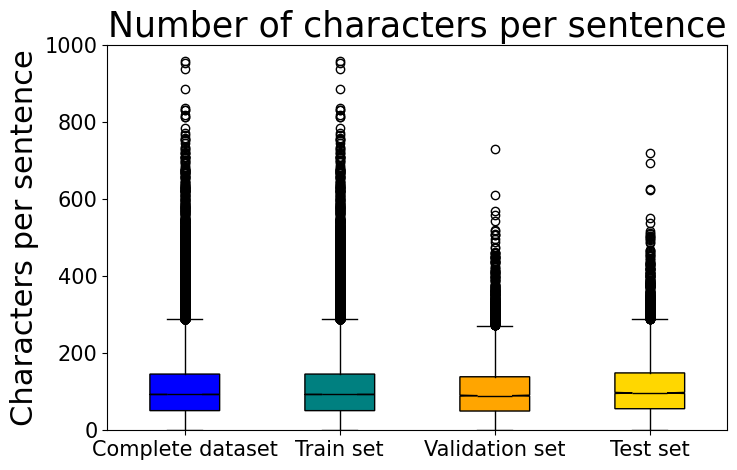

In [11]:
plt.figure(figsize = (8,5))
ax = plt.boxplot([np.array(d),np.array(tr), np.array(v),np.array(te)],notch=True,patch_artist=True,labels=['Complete dataset','Train set','Validation set','Test set']);
plt.ylim([0,1000])

# fill with colors
for patch, color in zip(ax['boxes'], ['blue','teal','orange','gold']):
    patch.set_facecolor(color)
for median in ax['medians']:
    median.set_color('black')
    
plt.title('Number of characters per sentence',fontsize=25)
plt.ylabel('Characters per sentence',fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

### Number of characters per text

In [12]:
tr = []
v = []
te = []
d = []
for i in range(len(train)):
    try:
        tr.append(len(train.iloc[i]['cleaned_story']))
    except:
        pass
for i in range(len(val)):
    try:
        v.append(len(val.iloc[i]['cleaned_story']))
    except:
        pass
for i in range(len(test)):
    try:
        te.append(len(test.iloc[i]['cleaned_story']))
    except:
        pass
for i in range(len(dataset_csv)):
    try:
        d.append(len(dataset_csv.iloc[i]['cleaned_story']))
    except:
        pass
print('# characters per text train:',np.mean(tr),np.std(tr),np.median(tr))
print('# characters per text val:',np.mean(v),np.std(v),np.median(v))
print('# characters per text test:',np.mean(te),np.std(te),np.median(te))
print('# characters per text complete dataset:',np.mean(d),np.std(d),np.median(d))

# characters per text train: 12781.561521252797 26650.663675290776 8473.5
# characters per text val: 11191.892857142857 11619.65912055109 8348.0
# characters per text test: 10717.035714285714 8970.412631782263 7699.5
# characters per text complete dataset: 12415.488372093023 24291.67233496844 8368.0


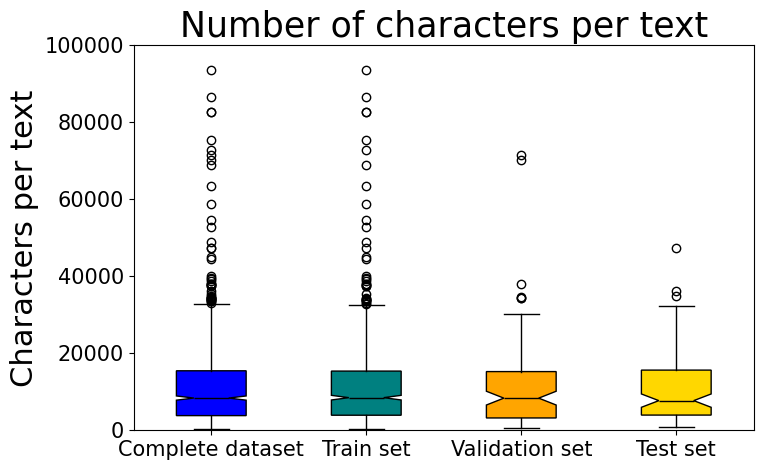

In [14]:
plt.figure(figsize = (8,5))
ax = plt.boxplot([np.array(d),np.array(tr), np.array(v),np.array(te)],notch=True,patch_artist=True,labels=['Complete dataset','Train set','Validation set','Test set']);
plt.ylim([0,100000])

# fill with colors
for patch, color in zip(ax['boxes'], ['blue','teal','orange','gold']):
    patch.set_facecolor(color)
for median in ax['medians']:
    median.set_color('black')
    
plt.title('Number of characters per text',fontsize=25)
plt.ylabel('Characters per text',fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [15]:
from Optimizer.scheduler_optim import ScheduledOptim
from BERT.BERT_model import BERT, BERTLM, BERT_TL
from torch.optim import Adam

model =  BERT_TL()

/opt/miniconda3/envs/fAIrytale/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/opt/miniconda3/envs/fAIrytale/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [34]:
optimizer = Adam(model.parameters(), lr=1e-4, betas=(0.9, 0.999), weight_decay=0.01)

scheduler = ScheduledOptim(
    optimizer, model.d_model, n_warmup_steps=500
    )
lr = []
for i in range(10000):
    scheduler.step_and_update_lr()
    lr.append(scheduler._optimizer.param_groups[0]['lr'])

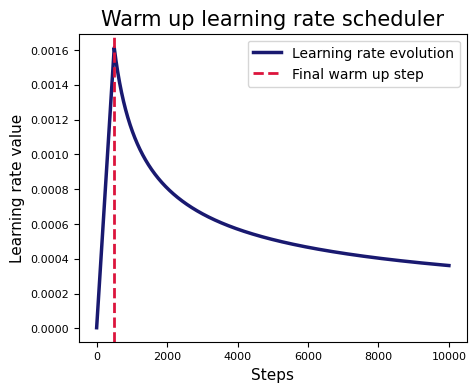

In [52]:
plt.figure(figsize = (5,4))
plt.plot(lr,color='midnightblue',linewidth=2.5,label='Learning rate evolution')
plt.axvline(500,color='crimson',linewidth=2,linestyle='--',label='Final warm up step')

plt.title('Warm up learning rate scheduler',fontsize=15)
plt.ylabel('Learning rate value',fontsize=11)
plt.xlabel('Steps',fontsize=11)

plt.tick_params(axis='both', which='major', labelsize=8)
plt.legend(fontsize=10)
plt.show()